In [ ]:
import pandas as pd
pd.set_option('max_columns', 500) 
pd.set_option('max_rows', 500) 
pd.set_option('display.max_colwidth', 300)
pd.options.display.float_format = "{:,.3f}".format

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import requests
import time
import random

from collections import Counter
from bs4 import BeautifulSoup


import regex as re

import nltk

from nltk.corpus import stopwords


from nltk.stem import WordNetLemmatizer

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.util import ngrams

import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.doc2vec import TaggedDocument

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn import utils

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import ADASYN

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import f1_score, classification_report, accuracy_score, matthews_corrcoef, roc_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve, auc, roc_auc_score, RocCurveDisplay

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mbti_cleaned.csv')

In [ ]:
df.shape

(8675, 15)

In [ ]:
df.head(10)

,Unnamed: 0,type,posts,num_posts,num_http,words_per_comment,nouns_per_commment,verbs_per_comment,adj_per_comment,interject_per_comment,cleaned_str,ie,ns,tf,jp
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-chan...,50,24,16.060,2.620,1.520,1.100,0.140,urlstr moments urlstr sportscenter top ten plays urlstr pranks life changing experience life urlstr urlstr repeat today may perc experience immerse last thing friend posted facebook committing suicide next day rest peace urlstr sorry hear distress natural relationship perfection time every momen...,I,N,F,J
1,1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|...,50,10,26.820,3.520,3.620,1.760,0.200,finding lack posts alarming sex boring position often example girlfriend currently environment creatively use cowgirl missionary enough giving new meaning game theory hello grin takes converse flirting acknowledge presence return words smooth wordplay cheeky grins lack balance hand eye coordinat...,E,N,T,P
2,2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I ...",50,5,18.660,3.000,2.540,1.580,0.240,good one urlstr course say know blessing curse absolutely positive best friend could amazing couple count yes could madly love case reconciled feelings thank link called ti si loop stem current topic obsession deadly like stuck thoughts mind wanders circles feels truly terrible noticed peculiar ...,I,N,T,P
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existe...",50,2,23.520,3.420,3.020,1.720,0.180,dear enjoyed conversation day esoteric gabbing nature universe idea every rule social code arbitrary constructs created dear sub long time see sincerely alpha none types hurt deep existential ways want part probably sliding scale depends individual preferences like everything humanity draco malf...,I,N,T,J
4,4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His ...,50,6,21.880,3.480,2.740,1.800,0.200,fired another silly misconception approaching logically going key unlocking whatever think entitled nobody wants approached bs guys really wants go super duper long ass vacation c mon guys boss listen get even approached logically everything never mind go permanent vacation two months crazy idea...,E,N,T,J
5,5,INTJ,"'18/37 @.@|||Science is not perfect. No scientist claims that it is, or that scientific information will not be revised as we discover new things. Rational thinking has been very useful to our society....|||INFP- Edgar Allen Poe was an INFP and he's in your siggy.|||People see the obvious Fi...",50,1,31.700,4.460,4.700,2.080,0.140,science perfect scientist claims scientific information revised discover new things rational thinking useful society edgar allen poe siggy people see obvious fi quick put agree ne see compare haku definite flat naruto lets get party started say

In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df.columns

Index(['type', 'posts', 'num_posts', 'num_http', 'words_per_comment',
       'nouns_per_commment', 'verbs_per_comment', 'adj_per_comment',
       'interject_per_comment', 'cleaned_str', 'ie', 'ns', 'tf', 'jp'],
      dtype='object')

In [ ]:
X = df['cleaned_str']
y = df['type']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42, stratify=y, test_size=0.33)

In [ ]:
type(X_train)

pandas.core.series.Series

In [ ]:
X_train.shape

(5812,)

In [ ]:
X_val.shape

(2863,)

In [ ]:
nlp = spacy.load('en_core_web_sm')
spacy_stop_words = spacy.lang.en.stop_words.STOP_WORDS

type_stopword = [x.lower() for x in df['type'].unique()]
type_stopwords = type_stopword + [x + 's' for x in type_stopword]

punctuations = string.punctuation

parser = English()

def spacy_tokenizer(sentence):
    
    mytokens = parser(sentence)

    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    mytokens = [ word for word in mytokens if \
                word not in spacy_stop_words and \
                word not in type_stopwords and \
                word not in punctuations ]

    return mytokens

In [ ]:
tvectotal = TfidfVectorizer(tokenizer=spacy_tokenizer, max_df=0.3).fit(X_train)
len(tvectotal.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


78890

In [ ]:
tvec = TfidfVectorizer(tokenizer=spacy_tokenizer, max_features=10000, max_df=0.3)

X_train_tvec = tvec.fit_transform(X_train)
X_val_tvec = tvec.transform(X_val)

In [ ]:
X_train_tvec.shape

(5812, 10000)

In [ ]:
X_val_tvec.shape

(2863, 10000)

In [ ]:
def classifiermodel(X_train, y_train, X_test, y_test, model, gs=False, param=False, title=None, label=None):
    
    """"
    Function to fit and display scores of the model, the confusion matrix and AUC ROC
    
    Take in Arguements:
     - X_train, y_train, X_test, y_test - the train test split data
     - model - the type of model to fit data
     - gs - if the model parsed in is a grid search
     - param - If need to print best parameters for pipe steps
     - labels - list that model is classification
     
     Returns the dataframe of the predicted values and actual values
    """    
    model.fit(X_train, y_train)
    trgscore = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    valscore = model.score(X_test, y_test)
    
    
    if gs:
        best_model = model.best_estimator_
        best_score = model.best_score_
        best_params =  model.best_params_
    else:
        best_model = model
        best_score = trgscore
        best_params = model.get_params()
        
    proba = model.predict_proba(X_test)
    proba = proba[:, 1]

    print(f'======== {title} =================\n')
    
    if param:
        print('Best parameters  : ', best_params)
        print()
    print('Best CV  score   : ', best_score)
    print('Training score   :', trgscore)
    print('Validation score :', valscore)
    print('Accuracy         :', accuracy_score(y_pred, y_test))
    print('MCC Score        :', matthews_corrcoef(y_pred, y_test))
    print()
    print(classification_report(y_test, y_pred, target_names=label))
        
    return y_pred, proba


In [ ]:
def model_metrics(true, pred, prob, cm=False, show_df=False, title = 'Model_Metrics'):
    """
    Function that calculates and returns a dataframe with classification metrics.
    Input
    true: true values of target variable
    pred: predicted values of target variable
    prob: probability of positive class 
    cm: confusion matrix will be plot if == True
    show_df: dataframe with metrics will be displayed if == True
    title: the column name for the dataframe that is displayed/returned
    labels: the negative and positive class labels 
    
    Output
    df: dataframe with classification metrics
    
    """        
        
    df = pd.DataFrame(data = [accuracy_score(pred, true),
                              1- accuracy_score(pred, true),
                              f1_score(true, pred, average='macro'),
                              f1_score(true, pred, average='weighted'),
                              matthews_corrcoef(true, pred)],
                         index = ['Accuracy',
                                  'Misclassification Rate',
                                  'F1-Score Macro',
                                  'F1-Score Weighted',
                                  'Matthews Correlation'],
                        columns = [title])
    if show_df:
        display(df)
    return(df)

In [ ]:
def plot_impt_features(features_df, title, top_feat=20):
    
    """
    Function that plots the important features_df.
    
    Takes in arguements:
    features _df: the list of features that had the coefficient 
    title: the title of the graph
    top_feat: the number of top features to plot
    
    Output
    Plots the graph of important features
    
    """   
    plt.figure(figsize=(12,6))
    sns.barplot(x = features_df['feature_importance'][:top_feat], y = features_df['feature'][:top_feat], color='b')
    plt.title(title, fontsize=18)
    plt.xlabel('Feature importance', fontsize=14)
    plt.xticks(size=13)
    plt.ylabel(None)
    plt.yticks(size=13);

In [ ]:
def show_most_informative_features(vectorizer, clf, n=20):
    
    """
    Function that shows the n most informative features.
    
    Takes in arguements:
    vectorizer: vectorize in which we get our word volcabulary
    clf: the mdel which the vector is being fed into
    n: the number of +ve and -ve coeff to plot
    
    Output
    Dataframe of positive and negative coeff
    
    """   
    
    
    feature_names = vectorizer.get_feature_names()
    
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    
    top_pos = coefs_with_fns[:-(n + 1):-1]
    top_neg = coefs_with_fns[:n]
 
    show_posfeat = pd.DataFrame(top_pos, columns=['positive_coeff', 'pos_feature'])
    show_negfeat = pd.DataFrame(top_neg, columns=['negative_coeff', 'neg_feature'])
    show_feat = show_posfeat.join(show_negfeat)
    
    display(show_feat)

In [ ]:
cv = 5
n_jobs = -1

In [ ]:
df['type'].value_counts(normalize=True)

INFP   0.211
INFJ   0.169
INTP   0.150
INTJ   0.126
ENTP   0.079
ENFP   0.078
ISTP   0.039
ISFP   0.031
ENTJ   0.027
ISTJ   0.024
ENFJ   0.022
ISFJ   0.019
ESTP   0.010
ESFP   0.006
ESFJ   0.005
ESTJ   0.004
Name: type, dtype: float64

In [ ]:
lr_pipe = Pipeline([('smt', SMOTETomek(random_state = 42)), 
                    ('lr', LogisticRegression(random_state = 42, max_iter=1000))])

lr_param_grid = {'lr__solver': ['liblinear'],
                 'lr__C':[1.0], #, 0.1]
                 'lr__penalty':['l1']}
    
lr_gs = GridSearchCV(lr_pipe, param_grid=lr_param_grid, cv=cv, n_jobs=n_jobs, verbose=1)

In [ ]:
lr_pred, lr_proba = classifiermodel(X_train_tvec, y_train, X_val_tvec, y_val,
                                    model=lr_gs, gs=True, param=True,
                                    title='LogisticRegression +  TF-IDF', label=type_stopword)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


======== LogisticRegression +  TF-IDF =================

Best parameters  :  {'lr__C': 1.0, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}

Best CV  score   :  0.33035357250152797
Training score   : 0.6262904335856848
Validation score : 0.3402025847013622
Accuracy         : 0.3402025847013622
MCC Score        : 0.25856269493920714

              precision    recall  f1-score   support

        infj       0.17      0.25      0.20        63
        entp       0.30      0.36      0.33       223
        intp       0.10      0.16      0.12        76
        intj       0.31      0.31      0.31       226
        entj       0.00      0.00      0.00        14
        enfj       0.00      0.00      0.00        16
        infp       0.00      0.00      0.00        13
        enfp       0.11      0.17      0.13        29
        isfp       0.47      0.33      0.39       485
        istp       0.51      0.39      0.44       605
        isfj       0.37      0.32      0.34       360
        istj    

In [ ]:
lr_m = model_metrics(y_val, lr_pred, lr_proba, cm=False, show_df=False, title = 'Logistic Reg')

In [ ]:
show_most_informative_features(tvec, lr_gs.best_estimator_.steps[1][1], n=20)

,positive_coeff,pos_feature,negative_coeff,neg_feature
0,40.565,eggsies,-14.984,te
1,23.434,dip,-14.958,literally
2,17.653,charisma,-8.742,perfectly
3,16.337,flower,-8.119,couple
4,16.027,fe,-7.708,order
5,15.848,seeker,-7.407,ways
6,14.440,helping,-7.205,op
7,14.353,jk,-6.873,respect
8,14.283,jawz,-6.551,watch
9,14.070,pack,-6.538,says


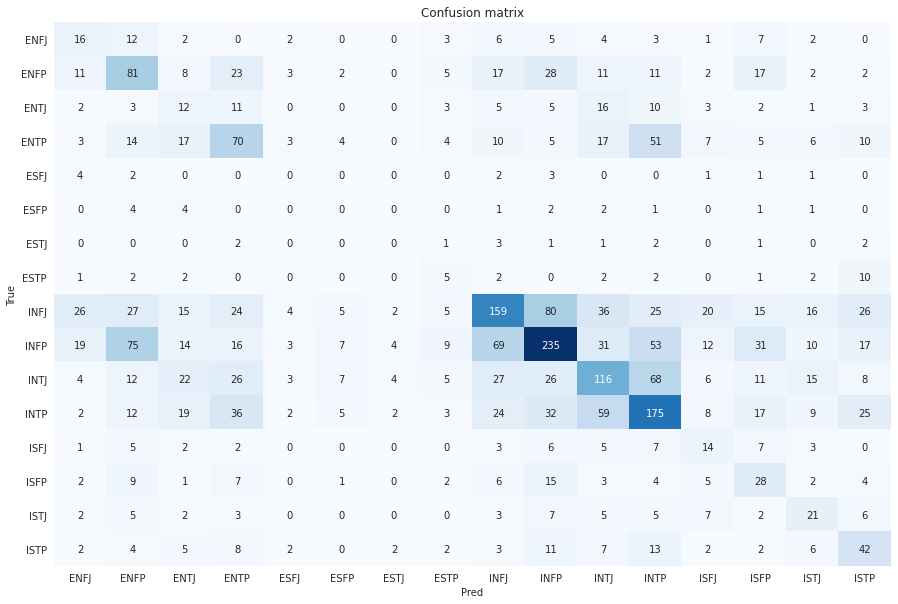

In [ ]:
classes = np.unique(y_val)
y_val_array = pd.get_dummies(y_val, drop_first=False).values

cm = confusion_matrix(y_val, lr_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

plt.show();

In [ ]:
nb_pipe = Pipeline([('smt', SMOTETomek(random_state = 42)), 
                    ('nb' , MultinomialNB())])

nb_param_grid = {}
    
nb_gs = GridSearchCV(nb_pipe, param_grid=nb_param_grid, cv=cv, n_jobs=n_jobs, verbose=1)

In [ ]:
nb_pred, nb_proba = classifiermodel(X_train_tvec, y_train, X_val_tvec, y_val, 
                            model=nb_gs, gs=True, param=False,
                            title='Naive Bayes +  TF-IDF', label=type_stopword)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


======== Naive Bayes +  TF-IDF =================

Best CV  score   :  0.35151375678367563
Training score   : 0.7964556090846524
Validation score : 0.35522179531959486
Accuracy         : 0.35522179531959486
MCC Score        : 0.2622051807502345

              precision    recall  f1-score   support

        infj       0.18      0.22      0.20        63
        entp       0.25      0.40      0.31       223
        intp       0.11      0.20      0.14        76
        intj       0.29      0.31      0.30       226
        entj       0.00      0.00      0.00        14
        enfj       0.00      0.00      0.00        16
        infp       0.00      0.00      0.00        13
        enfp       0.25      0.07      0.11        29
        isfp       0.46      0.37      0.41       485
        istp       0.46      0.47      0.46       605
        isfj       0.31      0.31      0.31       360
        istj       0.43      0.40      0.41       430
        estp       0.22      0.20      0.21        5

In [ ]:
nb_m = model_metrics(y_val, nb_pred, nb_proba, cm=False, show_df=False, title = 'Naive Bayes')

In [ ]:
show_most_informative_features(tvec, nb_gs.best_estimator_.steps[1][1], n=20)

,positive_coeff,pos_feature,negative_coeff,neg_feature
0,-6.262,fe,-10.210,aaron
1,-6.320,haha,-10.210,abandoned
2,-6.461,w,-10.210,aboard
3,-6.588,welcome,-10.210,abrasive
4,-6.838,ni,-10.210,abroad
5,-6.911,hope,-10.210,absent
6,-6.995,xd,-10.210,absorbing
7,-7.023,hey,-10.210,abstraction
8,-7.049,strong,-10.210,abusive
9,-7.099,totally,-10.210,ac


In [ ]:
rf_pipe = Pipeline([('smt', SMOTETomek(random_state = 42)), 
                    ('rf', RandomForestClassifier(random_state = 42))]) 

rf_param_grid = {
    'rf__n_estimators': [500], 
    'rf__max_depth': [7], 
    'rf__min_samples_split': [4] 
    }
    
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_param_grid, cv=cv, n_jobs=n_jobs, verbose=1)

In [ ]:
%%time
rf_pred, rf_proba = classifiermodel(X_train_tvec, y_train, X_val_tvec, y_val, 
                            model=rf_gs, gs=True, param=True,
                            title='Random Forest +  TF-IDF', label=type_stopword)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


======== Random Forest +  TF-IDF =================

Best parameters  :  {'rf__max_depth': 7, 'rf__min_samples_split': 4, 'rf__n_estimators': 500}

Best CV  score   :  0.23261817692092532
Training score   : 0.5812112869924294
Validation score : 0.2521830247991617
Accuracy         : 0.2521830247991617
MCC Score        : 0.1138194423911525

              precision    recall  f1-score   support

        infj       0.16      0.10      0.12        63
        entp       0.16      0.04      0.06       223
        intp       0.17      0.08      0.11        76
        intj       0.24      0.11      0.15       226
        entj       0.00      0.00      0.00        14
        enfj       0.00      0.00      0.00        16
        infp       0.00      0.00      0.00        13
        enfp       0.11      0.07      0.08        29
        isfp       0.29      0.20      0.23       485
        istp       0.26      0.70      0.38       605
        isfj       0.27      0.13      0.17       360
        ist

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rf_m = model_metrics(y_val, rf_pred, rf_proba, cm=False, show_df=False, title = 'Random Forest')

In [ ]:
rf_m

,Random Forest
Accuracy,0.252
Misclassification Rate,0.748
F1-Score Macro,0.132
F1-Score Weighted,0.212
Matthews Correlation,0.114


In [ ]:
rf_feature_importance = rf_gs.best_estimator_.steps[1][1].feature_importances_

rf_features_df = pd.DataFrame({'feature': tvec.get_feature_names(), 
                            'feature_importance': rf_feature_importance}).sort_values('feature_importance', ascending=False)
rf_features_df

,feature,feature_importance
7847,sela,0.008
5997,niss,0.007
8911,teddy,0.006
4210,hobbit,0.006
7172,rant,0.005
...,...,...
5015,knocked,0.000
5011,knit,0.000
5010,knights,0.000
5009,knight,0.000


In [ ]:
xgb_pipe = Pipeline([('smt', SMOTETomek(random_state = 42)), 
                    ('xgb', XGBClassifier(random_state = 42))]) 
xgb_param_grid = {
    'xgb__eval_metric' : ['merror'], 
    'xgb__subsample' : [0.5], 
    'xgb__colsample_bytree' : [0.5], 
    'xgb__learning_rate' : [.01], 
    'xgb__n_estimators' : [100], 
    'xgb__reg_alpha' : [0.01], 
    'xgb__gamma' : [0.1], 
}
    
xgb_gs = GridSearchCV(xgb_pipe, param_grid=xgb_param_grid, cv=cv, n_jobs=n_jobs, verbose=1)

In [ ]:
'''
%%time
xgb_pred, xgb_proba = classifiermodel(X_train_tvec, y_train, X_val_tvec, y_val, 
                            model=xgb_gs, gs=True, param=True,
                            title='XGBoost +  TF-IDF', label=type_stopword)
'''

"\n%%time\nxgb_pred, xgb_proba = classifiermodel(X_train_tvec, y_train, X_val_tvec, y_val, \n                            model=xgb_gs, gs=True, param=True,\n                            title='XGBoost +  TF-IDF', label=type_stopword)\n"

In [ ]:
lst_metrics = [lr_m, nb_m, rf_m]
combine_metrics = pd.concat((items for items in lst_metrics), axis=1, join='inner')
combine_metrics.reset_index().rename(columns={combine_metrics.index.name:'metrics'})  

combine_metrics

,Logistic Reg,Naive Bayes,Random Forest
Accuracy,0.340,0.355,0.252
Misclassification Rate,0.660,0.645,0.748
F1-Score Macro,0.229,0.228,0.132
F1-Score Weighted,0.351,0.356,0.212
Matthews Correlation,0.259,0.262,0.114
